# Imports

In [3]:
from numpy.random import seed
seed(888)
from tensorflow import set_random_seed
set_random_seed(404)

In [4]:
import os
import numpy as np
import tensorflow as tf

from time import strftime
from PIL import Image

# Constants

In [3]:
X_TRAIN_PATH = 'MNIST/digit_xtrain.csv'
X_TEST_PATH = 'MNIST/digit_xtest.csv'
Y_TRAIN_PATH = 'MNIST/digit_ytrain.csv'
Y_TEST_PATH = 'MNIST/digit_ytest.csv'

LOGGING_PATH = 'tensorboard_mnist_digit_logs/'

NR_CLASSES = 10
VALIDATION_SIZE = 10000
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
CHANNELS = 1
TOTAL_INPUTS = IMAGE_WIDTH*IMAGE_HEIGHT*CHANNELS

# Get the Data

In [4]:
y_train_all = np.loadtxt(Y_TRAIN_PATH, delimiter=',', dtype=int)

In [5]:
y_train_all.shape

(60000,)

In [6]:
y_test = np.loadtxt(Y_TEST_PATH, delimiter=',', dtype=int)

In [7]:
x_train_all = np.loadtxt(X_TRAIN_PATH, delimiter=',', dtype=int)

In [8]:
x_test = np.loadtxt(X_TEST_PATH, delimiter=',', dtype=int)

# Explore

In [9]:
x_train_all.shape

(60000, 784)

In [10]:
x_train_all[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [11]:
y_train_all.shape

(60000,)

In [12]:
x_test.shape

(10000, 784)

In [13]:
y_train_all[:5]

array([5, 0, 4, 1, 9])

# Data Preprocessing

In [14]:
# Re-scale
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

#### Convert target values to one-hot encoding

In [15]:
values = y_train_all[:5]
np.eye(10)[values]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [16]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [17]:
np.eye(10)[2]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
values

array([5, 0, 4, 1, 9])

In [19]:
values[4]

9

In [20]:
y_train_all = np.eye(NR_CLASSES)[y_train_all]

In [21]:
y_train_all.shape

(60000, 10)

In [22]:
y_test = np.eye(NR_CLASSES)[y_test]
y_test.shape

(10000, 10)

### Create validation dataset from training data

**Challenge:** Split the training dataset into a smaller training dataset and a validation dataset for the features and the labels. Create four arrays: ```x_val```, ```y_val```, ```x_train```, and ```y_train``` from ```x_train_all``` and ```y_train_all```. Use the validation size of 10,000. 

In [23]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [24]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [25]:
x_train.shape

(50000, 784)

In [26]:
x_val.shape

(10000, 784)

# Setup Tensorflow Graph

In [57]:
X = tf.placeholder(tf.float32, shape=[None, TOTAL_INPUTS], name='X')
Y = tf.placeholder(tf.float32, shape=[None, NR_CLASSES], name='labels')
print(X)

Tensor("X_2:0", shape=(?, 784), dtype=float32)


### Neural Network Architecture

#### Hyperparameters

In [28]:
nr_epochs = 50
learning_rate = 1e-3

n_hidden1 = 512
n_hidden2 = 64

In [29]:
def setup_layer(input, weight_dim, bias_dim, name):
    
    with tf.name_scope(name):
        initial_w = tf.truncated_normal(shape=weight_dim, stddev=0.1, seed=42)
        w = tf.Variable(initial_value=initial_w, name='W')

        initial_b = tf.constant(value=0.0, shape=bias_dim)
        b = tf.Variable(initial_value=initial_b, name='B')

        layer_in = tf.matmul(input, w) + b
        
        if name=='out':
            layer_out = tf.nn.softmax(layer_in)
        else:
            layer_out = tf.nn.relu(layer_in)
        
        tf.summary.histogram('weights', w)
        tf.summary.histogram('biases', b)
        
        return layer_out

In [30]:
# Model without dropout
# layer_1 = setup_layer(X, weight_dim=[TOTAL_INPUTS, n_hidden1], 
#                       bias_dim=[n_hidden1], name='layer_1')

# layer_2 = setup_layer(layer_1, weight_dim=[n_hidden1, n_hidden2], 
#                       bias_dim=[n_hidden2], name='layer_2')

# output = setup_layer(layer_2, weight_dim=[n_hidden2, NR_CLASSES], 
#                       bias_dim=[NR_CLASSES], name='out')

# model_name = f'{n_hidden1}-{n_hidden2} LR{learning_rate} E{nr_epochs}'

In [31]:
layer_1 = setup_layer(X, weight_dim=[TOTAL_INPUTS, n_hidden1], 
                      bias_dim=[n_hidden1], name='layer_1')

layer_drop = tf.nn.dropout(layer_1, keep_prob=0.8, name='dropout_layer')

layer_2 = setup_layer(layer_drop, weight_dim=[n_hidden1, n_hidden2], 
                      bias_dim=[n_hidden2], name='layer_2')

output = setup_layer(layer_2, weight_dim=[n_hidden2, NR_CLASSES], 
                      bias_dim=[NR_CLASSES], name='out')

model_name = f'{n_hidden1}-DO-{n_hidden2} LR{learning_rate} E{nr_epochs}'

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Tensorboard Setup

In [32]:
# Folder for Tensorboard

folder_name = f'{model_name} at {strftime("%H:%M")}'
directory = os.path.join(LOGGING_PATH, folder_name)

try:
    os.makedirs(directory)
except OSError as exception:
    print(exception.strerror)
else:
    print('Successfully created directories!')

Successfully created directories!


# Loss, Optimisation & Metrics

#### Defining Loss Function

In [33]:
with tf.name_scope('loss_calc'):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=output))

#### Defining Optimizer

In [34]:
with tf.name_scope('optimizer'):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    train_step = optimizer.minimize(loss)

#### Accuracy Metric

In [35]:
with tf.name_scope('accuracy_calc'):
    correct_pred = tf.equal(tf.argmax(output, axis=1), tf.argmax(Y, axis=1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [36]:
with tf.name_scope('performance'):
    tf.summary.scalar('accuracy', accuracy)
    tf.summary.scalar('cost', loss)

#### Check Input Images in Tensorboard

In [37]:
with tf.name_scope('show_image'):
    x_image = tf.reshape(X, [-1, 28, 28, 1])
    tf.summary.image('image_input', x_image, max_outputs=4)

# Run Session

In [38]:
sess = tf.Session()

#### Setup Filewriter and Merge Summaries

In [39]:
merged_summary = tf.summary.merge_all()

train_writer = tf.summary.FileWriter(directory + '/train')
train_writer.add_graph(sess.graph)

validation_writer = tf.summary.FileWriter(directory + '/validation')

#### Initialise all the variables

In [40]:
init = tf.global_variables_initializer()
sess.run(init)

### Batching the Data

In [41]:
size_of_batch = 1000

In [42]:
num_examples = y_train.shape[0]
nr_iterations = int(num_examples/size_of_batch)

index_in_epoch = 0

In [43]:
def next_batch(batch_size, data, labels):
    
    global num_examples
    global index_in_epoch
    
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > num_examples:
        start = 0
        index_in_epoch = batch_size
    
    end = index_in_epoch
    
    return data[start:end], labels[start:end]

### Training Loop

In [44]:
for epoch in range(nr_epochs):
    
    # ============= Training Dataset =========
    for i in range(nr_iterations):
        
        batch_x, batch_y = next_batch(batch_size=size_of_batch, data=x_train, labels=y_train)
        
        feed_dictionary = {X:batch_x, Y:batch_y}
        
        sess.run(train_step, feed_dict=feed_dictionary)
        
    
    s, batch_accuracy = sess.run(fetches=[merged_summary, accuracy], feed_dict=feed_dictionary)
        
    train_writer.add_summary(s, epoch)
    
    print(f'Epoch {epoch} \t| Training Accuracy = {batch_accuracy}')
    
    # ================== Validation ======================
    
    summary = sess.run(fetches=merged_summary, feed_dict={X:x_val, Y:y_val})
    validation_writer.add_summary(summary, epoch)

print('Done training!')

Epoch 0 	| Training Accuracy = 0.8640000224113464
Epoch 1 	| Training Accuracy = 0.8790000081062317
Epoch 2 	| Training Accuracy = 0.8899999856948853
Epoch 3 	| Training Accuracy = 0.9670000076293945
Epoch 4 	| Training Accuracy = 0.972000002861023
Epoch 5 	| Training Accuracy = 0.9700000286102295
Epoch 6 	| Training Accuracy = 0.9739999771118164
Epoch 7 	| Training Accuracy = 0.9819999933242798
Epoch 8 	| Training Accuracy = 0.9779999852180481
Epoch 9 	| Training Accuracy = 0.9810000061988831
Epoch 10 	| Training Accuracy = 0.9860000014305115
Epoch 11 	| Training Accuracy = 0.9850000143051147
Epoch 12 	| Training Accuracy = 0.984000027179718
Epoch 13 	| Training Accuracy = 0.9860000014305115
Epoch 14 	| Training Accuracy = 0.9860000014305115
Epoch 15 	| Training Accuracy = 0.9879999756813049
Epoch 16 	| Training Accuracy = 0.9879999756813049
Epoch 17 	| Training Accuracy = 0.9909999966621399
Epoch 18 	| Training Accuracy = 0.9879999756813049
Epoch 19 	| Training Accuracy = 0.989000022

# Make a Prediction

In [45]:
img = Image.open('MNIST/test_img.png')
img

In [46]:
bw = img.convert('L')

In [47]:
img_array = np.invert(bw)

In [48]:
img_array.shape

(28, 28)

In [49]:
test_img = img_array.ravel()

In [50]:
test_img.shape

(784,)

In [51]:
prediction = sess.run(fetches=tf.argmax(output, axis=1), feed_dict={X:[test_img]})

In [52]:
print(f'Prediction for test image is {prediction}')

Prediction for test image is [2]


# Testing and Evaluation

**Challenge:** Calculate the accuracy over the test dataset (```x_test``` and ```y_test```). Use your knowledge of running a session to get the accuracy. Display the accuracy as a percentage rounded to two decimal numbers. 

In [53]:
test_accuracy = sess.run(fetches=accuracy, feed_dict={X:x_test, Y:y_test})
print(f'Accuracy on test set is {test_accuracy:0.2%}')

Accuracy on test set is 97.74%


# Reset for the Next Run

In [136]:
train_writer.close()
validation_writer.close()
sess.close()
tf.reset_default_graph()

NameError: name 'train_writer' is not defined

In [1]:
import requests
import cv2
import numpy as np

from PIL import Image

resp = requests.get('https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/mh-formcheck-pushup-2-1551985758.png?crop=1xw:1xh;center,top&resize=768:*')

In [2]:
test = requests.get('https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.menshealth.com%2Ffitness%2Fa26752486%2Fperfect-push-up%2F&psig=AOvVaw01r2k0YzxJz2I_GKSC80Kk&ust=1576927238885000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCIjo6JuOxOYCFQAAAAAdAAAAABAI')

In [3]:
resp.content

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x00\x00\x00\x01\x80\x08\x02\x00\x00\x00\x95\xcc\x92(\x00\x01\x00\x00IDATx\x9c\xec\xfd\xdb\x92,9\x92-\x88-\x85EVu\xf3\xccP\x86\xff\xff/\xa4\xf0\xf2\x1b\x14\xe1\x0b\xdfH\xca\x1c\x99>=]\xb9\xc3\xb0\xf8\xa0\x17(n\xe6\xe6\x1e\xb1weV\xbav\xf5N\x0f3\x18\xeeP]\xaaP(\x84\x95\xd8\x91\xbe\x91\xed\xfb1e\x90\x00\xf4\x7f\xbfBQ\x01Y\x952\xa4\x9c\xdf\xde\xaf?@\xff\\\xa4\xfd^$\x13\x00\x90\x94\x80\xc5\x9b\xcb\xd4\xee\x1b9T\xad\xda\x942*p]\x93\xa0\x13\x10\xb1&h\xc5\x8a7\x99\xec\xc6\xc1\xaa\x97\xc6\xe5\xce\xf80\xe5&\xd1\x99\xb9\xc3\xe5A\'\xb7\xbe\xf5z\xd0\xff\x14\xfd\xf3\x8b\xf3\xa4/\r\x14\x08X\x01@\nt\x86K\x91!U\xae3IpLC\x12\x80@\xba\x94)\xb7\x18 \xcaz(\x81\xd4X\xb1N\xb3LsQ\xf4\x12\x08\x94\xc7\x83\x12\x03A\xa6\xc51|V\x1e\xe5\x92J\xd7rs\xfe\xf0I%\x9b\xda\xd84\x8ejH?=r>\x00\x88">\x1be=Y\x08T@\x88a\xa0\xba\xd9\xc5\xae\xb1V\xba@\xee7v"\xa9wS\xb6\x06\x16\xef\xb4\\\xb7k\x1e\xa5\x89\xe3\xc3\xae\x06O\xd68g8\xd0kY\xbd\xe9M\x7fU\xfa\x18\x1f\xcc\xa0a\xb7\xa4\x1f.\xb

In [4]:
nparr = np.fromstring(resp.content, np.uint8)
img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
img

/Users/youn/miniconda3/envs/deeplearning101/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


array([[[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[196, 192, 195],
        [196, 192, 194],
        [195, 191, 194],
        ...,
        [202, 198, 200],
        [206, 202, 205],
        [207, 203, 206]],

       [[196, 192, 195],
        [193, 190, 193],
        [193, 189, 192],
        ...,
        [205, 202, 204],
        [205, 202, 204],
        [210, 207, 209]],

       [[195, 190, 196],
        [194, 189, 194],
        [193, 188, 194],
        ...,
        [208, 206, 206],
        [207, 204, 205],
        [210, 208, 208]]

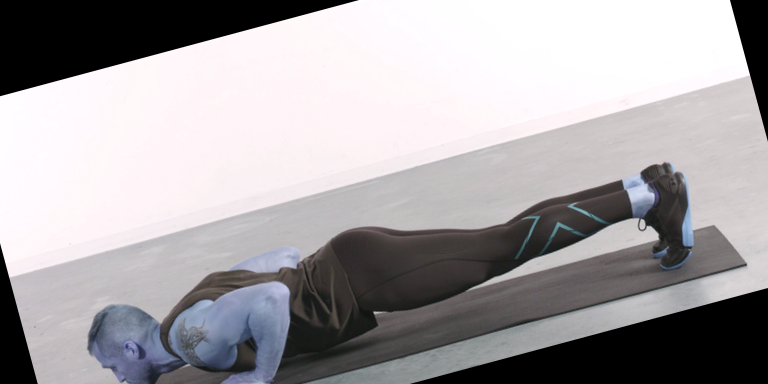

In [5]:
new_im = Image.fromarray(img)
center = img.shape[1] * 0.5, img.shape[0] * 0.5 
rotation = cv2.getRotationMatrix2D(center, 15.0, 1)
ret = cv2.warpAffine(
    img,
    rotation,
    img.shape[1::-1],
    flags=cv2.INTER_AREA,
    borderMode=cv2.BORDER_CONSTANT
)
Image.fromarray(ret)

In [6]:
img.shape[1::-1]

(768, 384)

In [7]:
import math, random
from tensorpack.dataflow.imgaug.geometry import RotationAndCropValid

In [8]:
scalew = random.uniform(0.8, 1.2)
scaleh = random.uniform(0.8, 1.2)

In [9]:
ret = ret[:,:, np.newaxis]

In [10]:
neww, newh = RotationAndCropValid.largest_rotated_rect(ret.shape[1], ret.shape[0], 180.0)

In [11]:
neww = min(neww, ret.shape[1])
newh = min(newh, ret.shape[0])
newx = int(center[0] - neww * 0.5)
newy = int(center[1] - newh * 0.5)

In [12]:
img = ret[newx:newx + neww, newy:newy + neww]
img.shape

(384, 768, 1, 3)

In [13]:
img = img.reshape(384,768,3)

In [14]:
img = cv2.flip(img,-1)

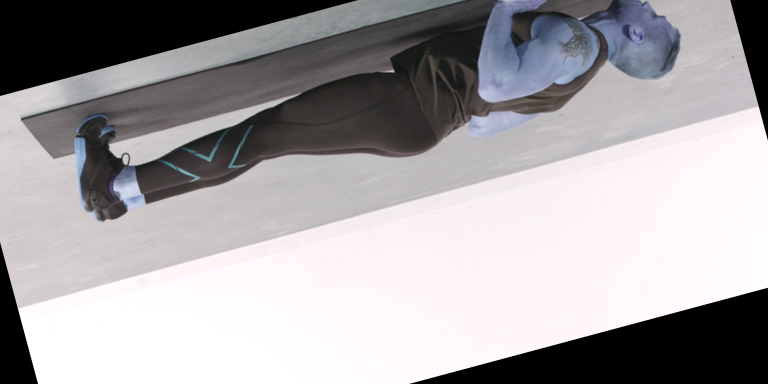

In [15]:
Image.fromarray(img)

In [16]:
x = np.array([[3,0,0],[0,4,0],[5,6,0]])
x

array([[3, 0, 0],
       [0, 4, 0],
       [5, 6, 0]])

In [17]:
np.nonzero(x)

(array([0, 1, 2, 2]), array([0, 1, 0, 1]))

In [18]:
x[np.nonzero(x)]

array([3, 4, 5, 6])

In [29]:
import threading

def sum(low, high):
    total = 0
    for i in range(low, high):
        total += i
    print("Subthread", total)

In [41]:
t = threading.Thread(target=sum, args=(1, 1200000))
t.start()
print("Main Thread")

Subthread 719999400000
Main Thread
